Saving تنزيل (1).png to تنزيل (1).png


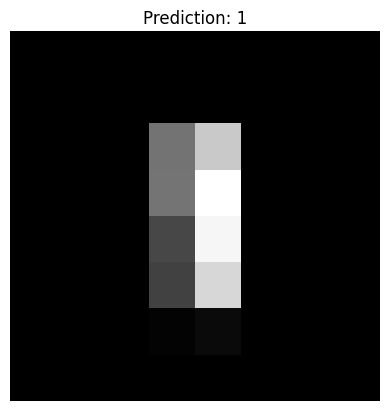

In [ ]:

import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

# =============================
# 1. Load MNIST-like dataset from scikit-learn
# =============================
digits = load_digits()  # 8x8 images, 64 features
X = digits.images.reshape((len(digits.images), -1))  # Flatten 8x8 -> 64
y = digits.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =============================
# 2. Train KNN Classifier
# =============================
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# =============================
# 3. Upload Your Own Images
# =============================
uploaded = files.upload()

def prepare_image(filename):
    # Open image and convert to grayscale
    img = Image.open(filename).convert("L")
    img = img.resize((8, 8))  # Scikit-learn digits dataset is 8x8

    # Convert to numpy array
    img_array = np.array(img)

    # Invert colors
    img_array = 255 - img_array

    # Normalize to 0–16 (like sklearn digits)
    img_array = (img_array / 255.0) * 16

    # Flatten
    return img_array.flatten(), img_array

# =============================
# 4. Predict Uploaded Images
# =============================
for filename in uploaded.keys():
    img_flat, display_img = prepare_image(filename)
    predicted_digit = knn.predict([img_flat])[0]

    # Show result
    plt.imshow(display_img, cmap="gray")
    plt.title(f"Prediction: {predicted_digit}")
    plt.axis("off")
    plt.show()